# height-weight.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('dataset/height-weight.csv')
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


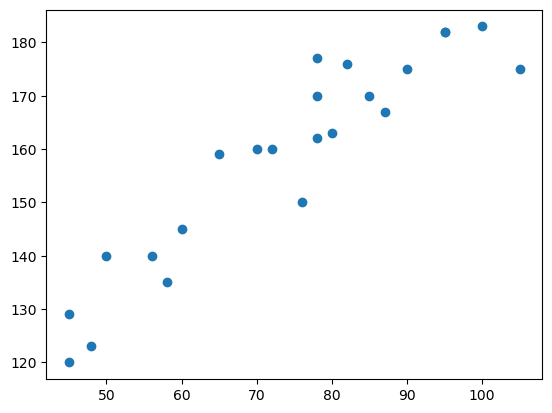

In [4]:
#scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.show()

In [5]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


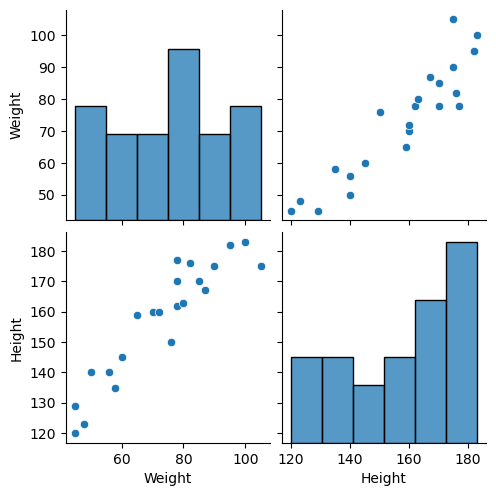

In [6]:
sns.pairplot(df)

In [7]:
#Independent & dependent features
x=df['Weight']
np.array(x)


array([ 45,  58,  48,  60,  70,  78,  80,  90,  95,  78,  82,  95, 105,
       100,  85,  78,  50,  65,  76,  87,  45,  56,  72], dtype=int64)

In [8]:
x

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64

In [9]:
x.shape

(23,)

In [10]:
type(x)

pandas.core.series.Series

In [11]:
x=df[['Weight']]  ##independent features should dataframe or 2D array
np.array(x)

array([[ 45],
       [ 58],
       [ 48],
       [ 60],
       [ 70],
       [ 78],
       [ 80],
       [ 90],
       [ 95],
       [ 78],
       [ 82],
       [ 95],
       [105],
       [100],
       [ 85],
       [ 78],
       [ 50],
       [ 65],
       [ 76],
       [ 87],
       [ 45],
       [ 56],
       [ 72]], dtype=int64)

In [12]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [13]:
x.shape

(23, 1)

In [14]:
type(x)

pandas.core.frame.DataFrame

In [15]:
y=df['Height']  ##dependent features can series or 1D array
np.array(y)

array([120, 135, 123, 145, 160, 162, 163, 175, 182, 170, 176, 182, 175,
       183, 170, 177, 140, 159, 150, 167, 129, 140, 160], dtype=int64)

In [16]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [17]:
y.shape

(23,)

In [18]:
type(y)

pandas.core.series.Series

In [19]:
#Train test split
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
x_train

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [22]:
x_test

,Weight
15,78
9,78
0,45
8,95
17,65
12,105


In [23]:
y_train

1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [24]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64

# Standardization

In [25]:
from sklearn.preprocessing import StandardScaler
##for tain-fit_transform
##for test-transform

In [26]:
scaler=StandardScaler()
scaler.fit_transform(x_train)

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [27]:
scaler.transform(x_test)

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

# Linear regression:

In [28]:
#Apply Simple Linear regression:
from sklearn.linear_model import LinearRegression

In [29]:
regresson=LinearRegression(n_jobs=-1)
regresson.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [30]:
regresson.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [31]:
regresson.coef_

array([1.04792503])

In [32]:
regresson.intercept_

80.52684512622542

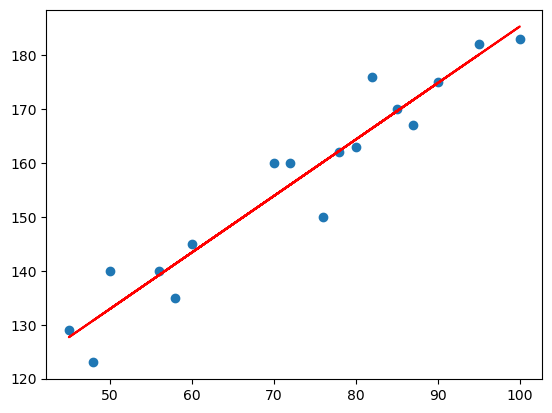

In [33]:
#plot training data
plt.scatter(x_train,y_train)
plt.plot(x_train,regresson.predict(x_train),color='red')

In [34]:
y_pred=regresson.predict(x_test)

In [35]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [36]:
###DEtecting y_pred values:
#y=M*X+b
#y=(regresson.coef_*x_test)+y_intercept
y=(1.04792503*78)+80.52684512622542
y

162.26499746622542

In [37]:
#y=(regresson.coef_*x_test)+y_intercept
y=(1.04792503*45)+80.52684512622542
y

127.68347147622544

In [38]:
#y=(regresson.coef_*x_test)+y_intercept
y=(1.04792503*95)+80.52684512622542
y

180.0797229762254

In [39]:
#y=(regresson.coef_*x_test)+y_intercept
y=(1.04792503*65)+80.52684512622542
y

148.64197207622544

In [40]:
#y=(regresson.coef_*x_test)+y_intercept
y=(1.04792503*105)+80.52684512622542
y

190.55897327622543

# Finding MSE,RMSE,MAE,R2

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mse

114.84069295228686

In [42]:
mae=mean_absolute_error(y_test,y_pred)
mae

9.665125886795005

In [43]:
rmse=np.sqrt(mse)
rmse

10.7163749912126

In [44]:
r2=r2_score(y_test,y_pred)
r2

0.7360826717981279

In [45]:
print("Mean Squared Error:", mse)
print("mean_absolute_error:",mae)
print("Root Mean Squared Error:", rmse)
print("R2_score:", r2)


Mean Squared Error: 114.84069295228686
mean_absolute_error: 9.665125886795005
Root Mean Squared Error: 10.7163749912126
R2_score: 0.7360826717981279


In [46]:
1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6701033397476599

# OLS Linear regression

In [47]:
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()


In [48]:
prediction=model.predict(x_test)
prediction

15    164.134205
9     164.134205
0      94.692811
8     199.907045
17    136.778504
12    220.949891
dtype: float64

In [49]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                    2.80e-16
Time:                        11:47:04   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\bldea\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [50]:
###Detecting y_pred values:
#y=M*X-std_err
#y=(regresson.coef_*x_test)-std_err
y=(2.1043*78)-0.063  
y

164.0724

In [51]:
#y=(regresson.coef_*x_test)-std_err
y=(2.1043*45)-0.063  
y

94.63049999999998

In [52]:
#y=(regresson.coef_*x_test)-std_err
y=(2.1043*95)-0.063  
y

199.8455

In [53]:
#y=(regresson.coef_*x_test)-std_err
y=(2.1043*65)-0.063  
y

136.7165

In [54]:
#y=(regresson.coef_*x_test)-std_err
y=(2.1043*105)-0.063  
y

220.8885

# Multiple Linear Regression

# economic_index.csv

In [56]:
df=pd.read_csv('dataset/economic_index.csv')
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [57]:
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [58]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [59]:
#check for null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

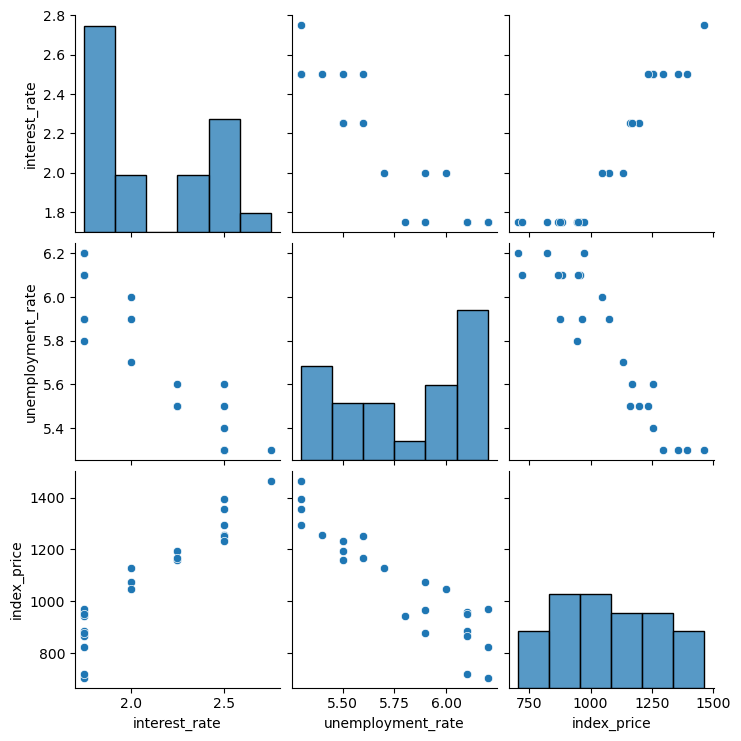

In [60]:
#Visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [61]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

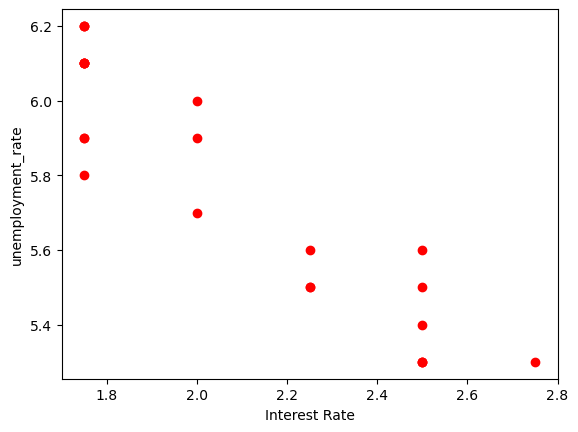

In [62]:
#visualize the dataploints more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("unemployment_rate")

In [63]:
#independent and dependent features
x=df[['interest_rate','unemployment_rate']]

In [64]:
x

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [65]:
y=df['index_price']

In [66]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [67]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [68]:
#train and split
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

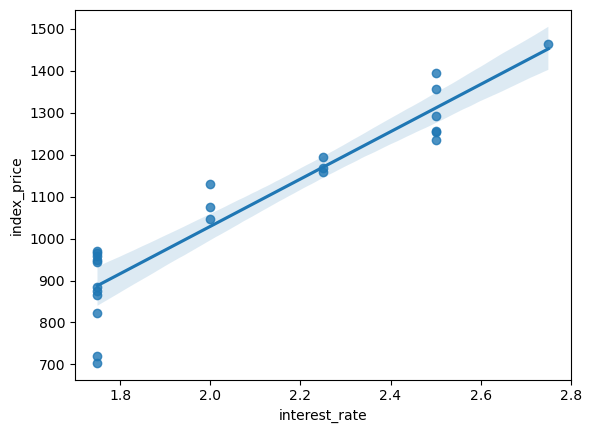

In [70]:
import seaborn as sns
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

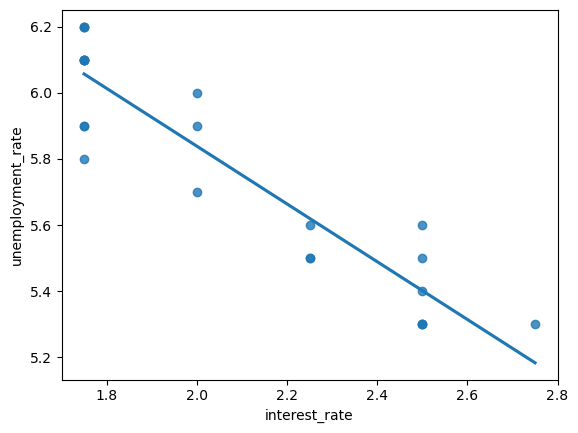

In [71]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'],ci=None)

In [72]:
from sklearn.preprocessing import StandardScaler
##for tain-fit_transform
##for test-transform

In [73]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [74]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [75]:
#Apply Simple Linear regression:
from sklearn.linear_model import LinearRegression

In [76]:
regresson=LinearRegression()
regresson.fit(x_train,y_train)

LinearRegression()

In [77]:
regresson.fit(x_train,y_train)

LinearRegression()

In [78]:
##Cross Validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regresson,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [79]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [80]:
np.mean(validation_score)

-5914.828180162388

In [81]:
##prediction
y_pred=regresson.predict(x_test)

In [82]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [83]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mse

5793.762887712579

In [84]:
mae=mean_absolute_error(y_test,y_pred)
mae

59.935781523235526

In [85]:
rmse=np.sqrt(mse)
rmse

76.11677139574812

In [86]:
r2=r2_score(y_test,y_pred)
r2

0.8278978091457142

In [87]:
print("Mean Squared Error:", mse)
print("mean_absolute_error:",mae)
print("Root Mean Squared Error:", rmse)
print("R2_score:", r2)


Mean Squared Error: 5793.762887712579
mean_absolute_error: 59.935781523235526
Root Mean Squared Error: 76.11677139574812
R2_score: 0.8278978091457142


In [88]:
1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.713163015242857

# Assumptions

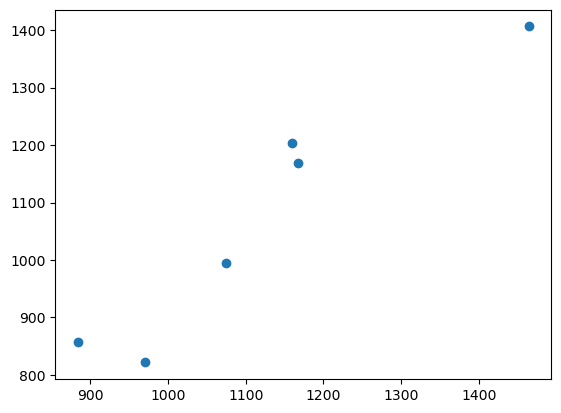

In [89]:
plt.scatter(y_test,y_pred)

In [90]:
residuals=y_test-y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

C:\Users\bldea\AppData\Local\Temp\ipykernel_12820\3762910054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='index_price', ylabel='Density'>

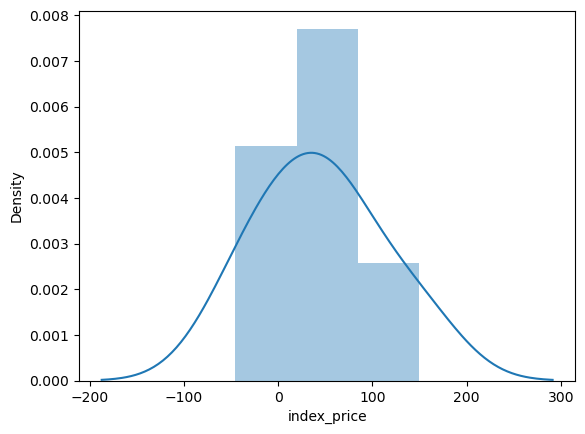

In [91]:
sns.distplot(residuals,kde=True)

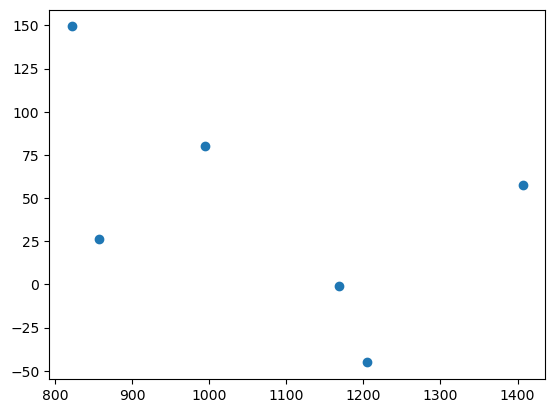

In [92]:
##Scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [93]:
##OLS Linear regreesion
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()


In [94]:
prediction=model.predict(x_test)
prediction

array([ 150.78325954, -231.79392541,  353.06855924, -195.73554836,
        -58.53452146,  114.72488249])

In [95]:
model.summary()

C:\Users\bldea\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                       0.754
Time:                        11:49:44   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""